In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [3]:
# Link in book is dead, so we will use an identical CSV file from https://github.com/IBM/invoke-wml-using-cognos-custom-control/
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# 2. Data Analysis & Preparation

#### - Encoding target var: Churn

In [6]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
df['Churn'].mean()

0.2653698707936959

#### - TotalCharges

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [9]:
df.shape

(7043, 21)

In [10]:
df.dropna().shape

(7032, 21)

In [11]:
df = df.dropna()

#### - Continuous Vars

In [12]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [13]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

In [14]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.028756e-16,4.688495e-14,7.150708e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [15]:
continuous_vars = list(df.describe().columns)
continuous_vars

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

#### - One-Hot Encoding

In [16]:
for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


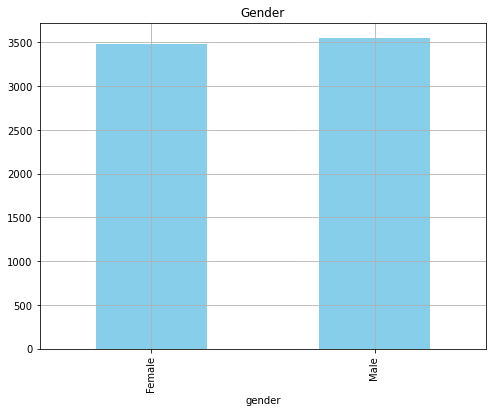

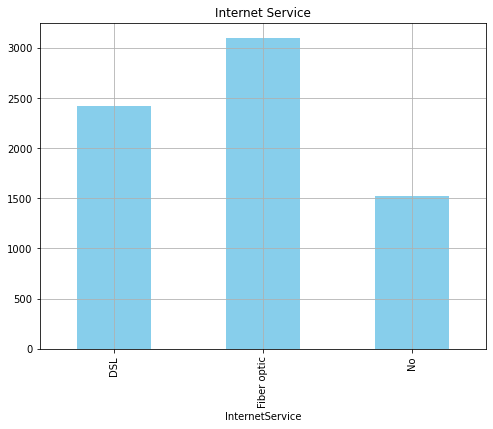

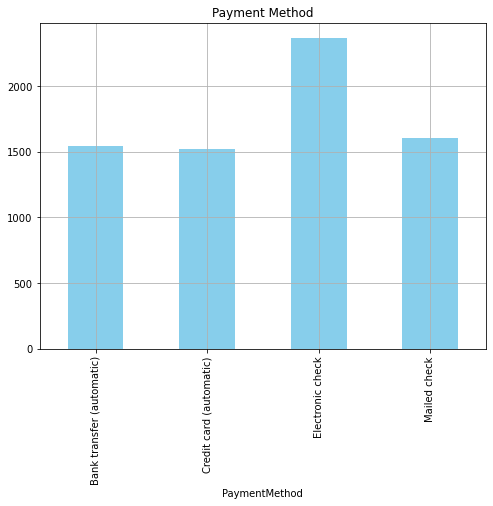

In [17]:
df.groupby('gender').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

df.groupby('InternetService').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

df.groupby('PaymentMethod').count()['customerID'].plot(
    kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [18]:
dummy_cols = []

sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [19]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [20]:
sample_set.shape

(7032, 47)

In [21]:
list(sample_set.columns)

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'genderFemale',
 'genderMale',
 'SeniorCitizen0',
 'SeniorCitizen1',
 'PartnerNo',
 'PartnerYes',
 'DependentsNo',
 'DependentsYes',
 'PhoneServiceNo',
 'PhoneServiceYes',
 'MultipleLinesNo',
 'MultipleLinesNo phone service',
 'MultipleLinesYes',
 'InternetServiceDSL',
 'InternetServiceFiber optic',
 'InternetServiceNo',
 'OnlineSecurityNo',
 'OnlineSecurityNo internet service',
 'OnlineSecurityYes',
 'OnlineBackupNo',
 'OnlineBackupNo internet service',
 'OnlineBackupYes',
 'DeviceProtectionNo',
 'DeviceProtectionNo internet service',
 'DeviceProtectionYes',
 'TechSupportNo',
 'TechSupportNo internet service',
 'TechSupportYes',
 'StreamingTVNo',
 'StreamingTVNo internet service',
 'StreamingTVYes',
 'StreamingMoviesNo',
 'StreamingMoviesNo internet service',
 'StreamingMoviesYes',
 'ContractMonth-to-month',
 'ContractOne year',
 'ContractTwo year',
 'PaperlessBillingNo',
 'PaperlessBillingYes',
 'PaymentMethodBank transfer (au

# 3. Train & Test Sets

In [22]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]

# 4. Aritificial Neural Network (ANN) with Keras

In [37]:
#need to install keras, you can comment this cell out after it is installed
import sys
!conda install --yes --prefix {sys.prefix} keras

#if you run into user permissions:   
# PC: 
  # search your computer for Anaconda Prompt and run as administrator.
  # Enter 'conda install keras' (no quotes) and answer all prompts

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.18  |       haa95532_0         122 KB
    certifi-2021.10.8          |   py39haa95532_2         152 KB
    openssl-1.1.1n             |       h2bbff1b_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> pkgs/main::ca-certificates-2022.3.18-haa95532_0
  certifi            conda-forge::certifi-2021.10.8-py39hc~ --> pkgs/main::certifi-2021.10.8-py39haa95532_2

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.12.

There are dependency issues with the latest anaconda preventing the installation of tensorflow.  
To resolve this, we need to open anconda prompt and run the following two commands<br>
Keep an eye out for any actionable feedback

`conda update --all --yes`

`conda install -c conda-forge tensorflow`

In [23]:
from keras.models import Sequential
from keras.layers import Dense

#### - Training a Neural Network Model

In [24]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features], 
    sample_set[target_var], 
    test_size=0.3
)

In [28]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 [==============================] - 1s 712us/step - loss: 0.6189 - accuracy: 0.6782
Epoch 2/50
50/50 [==============================] - 0s 672us/step - loss: 0.4607 - accuracy: 0.7907
Epoch 3/50
50/50 [==============================] - 0s 672us/step - loss: 0.4209 - accuracy: 0.8027
Epoch 4/50
50/50 [==============================] - 0s 712us/step - loss: 0.4145 - accuracy: 0.8082
Epoch 5/50
50/50 [==============================] - 0s 692us/step - loss: 0.4107 - accuracy: 0.8098
Epoch 6/50
50/50 [==============================] - 0s 712us/step - loss: 0.4087 - accuracy: 0.8094
Epoch 7/50
50/50 [==============================] - 0s 692us/step - loss: 0.4072 - accuracy: 0.8096
Epoch 8/50
50/50 [==============================] - 0s 712us/step - loss: 0.4062 - accuracy: 0.8102
Epoch 9/50
50/50 [==============================] - 0s 712us/step - loss: 0.4045 - accuracy: 0.8111
Epoch 10/50
50/50 [==============================] - 0s 692us/step - loss: 0.4037 - accuracy: 0.8094

#### - Accuracy, Precision, Recall

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [30]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

In [31]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8153
Out-of-Sample Accuracy: 0.7919


In-Sample Precision: 0.6934
Out-of-Sample Precision: 0.6619


In-Sample Recall: 0.5344
Out-of-Sample Recall: 0.4808


#### - ROC & AUC

In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

In [34]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [35]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8689
Out-Sample AUC: 0.8421


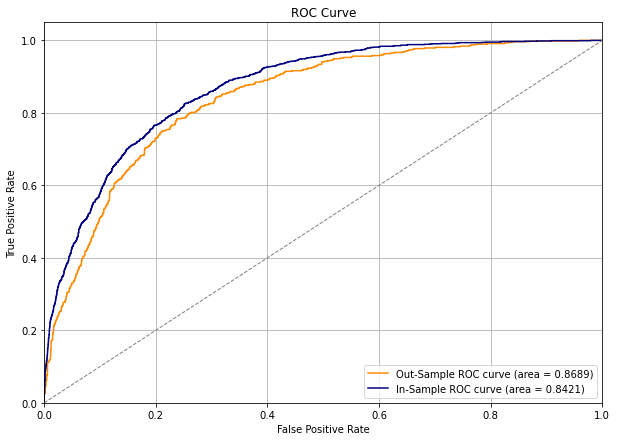

In [36]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()